In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from scipy import stats
import math

raw_data = pd.read_csv('data.csv',encoding='unicode_escape')
df = raw_data.copy()

df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


In [2]:
df.drop_duplicates(inplace=True)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month_Year']  = df['InvoiceDate'].dt.strftime('%Y-%m')
df.reset_index(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536641 entries, 0 to 536640
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   index        536641 non-null  int64         
 1   InvoiceNo    536641 non-null  object        
 2   StockCode    536641 non-null  object        
 3   Description  535187 non-null  object        
 4   Quantity     536641 non-null  int64         
 5   InvoiceDate  536641 non-null  datetime64[ns]
 6   UnitPrice    536641 non-null  float64       
 7   CustomerID   401604 non-null  float64       
 8   Country      536641 non-null  object        
 9   Month_Year   536641 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 40.9+ MB


In [3]:
df = df.sort_values(by=['InvoiceDate'])

existing_ids=[]
existing_ids = set(df['CustomerID'].dropna())

# Identify the specific range of customer IDs
min_customer_id = 12346

# Group by 'InvoiceDate' and count null values in 'CustomerID' column
List_missing_IDs = df.groupby('InvoiceDate')['CustomerID'].apply(lambda x: x.isnull().sum())

missing_ids = []
new_ID = min_customer_id
# Iterate through the index and value of the Series using 'items' method
for date, missing_count in List_missing_IDs.items():
    if new_ID in existing_ids:
        new_ID +=1
    else:
        missing_ids.append(new_ID)
        new_ID +=1

for date, count in List_missing_IDs.items():
    if count > 0:
        mask = (df['InvoiceDate'] == date) & (df['CustomerID'].isnull())
        df.loc[mask, 'CustomerID'] = missing_ids.pop(0)

In [4]:
df.isnull().sum()

index             0
InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
Month_Year        0
dtype: int64

In [5]:
# We assign the entries with negative quantity (returns) int o a seperate dataframe
returns_df = df[(df['Quantity']<0) | (df['UnitPrice']<0)]
returns_df.describe(include='all')


C:\Users\27722\AppData\Local\Temp\ipykernel_12020\2614761381.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  returns_df.describe(include='all')


,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month_Year
count,10589.000000,10589,10589,9727,10589.000000,10589,10589.000000,10589.000000,10589,10589
unique,NaN,5174,2560,2111,NaN,4853,NaN,NaN,30,13
top,NaN,C570867,M,Manual,NaN,2011-10-12 16:17:00,NaN,NaN,United Kingdom,2011-10
freq,NaN,101,244,244,NaN,101,NaN,NaN,9159,1340
first,NaN,NaN,NaN,NaN,NaN,2010-12-01 09:41:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2011-12-09 11:58:00,NaN,NaN,NaN,NaN
mean,256091.224100,NaN,NaN,NaN,-45.567570,NaN,40.343841,15351.464728,NaN,NaN
std,149075.450713,NaN,NaN,NaN,1093.946868,NaN,642.881874,1969.582238,NaN,NaN
min,141.000000,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN,NaN
25%,132295.000000,NaN,NaN,NaN,-10.000000,NaN,1.060000,13725.000000,NaN,NaN


In [6]:
# Now we want to have a dataframe with only the purchase values:
sales_df = df[(df['Quantity']>=0) & (df['UnitPrice']>=0)]
sales_df.describe(include='all')

C:\Users\27722\AppData\Local\Temp\ipykernel_12020\4279836276.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  sales_df.describe(include='all')


,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month_Year
count,526052.000000,526052,526052,525460,526052.000000,526052,526052.000000,526052.000000,526052,526052
unique,NaN,20726,3941,4077,NaN,19050,NaN,NaN,38,13
top,NaN,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom,2011-11
freq,NaN,1114,2258,2315,NaN,1114,NaN,NaN,481141,82133
first,NaN,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN,NaN
mean,270944.075363,NaN,NaN,NaN,10.730911,NaN,3.913818,15756.538346,NaN,NaN
std,156414.843422,NaN,NaN,NaN,157.592136,NaN,36.053205,2102.236158,NaN,NaN
min,0.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,12346.000000,NaN,NaN
25%,135487.750000,NaN,NaN,NaN,1.000000,NaN,1.250000,14040.000000,NaN,NaN


<Axes: xlabel='Quantity'>

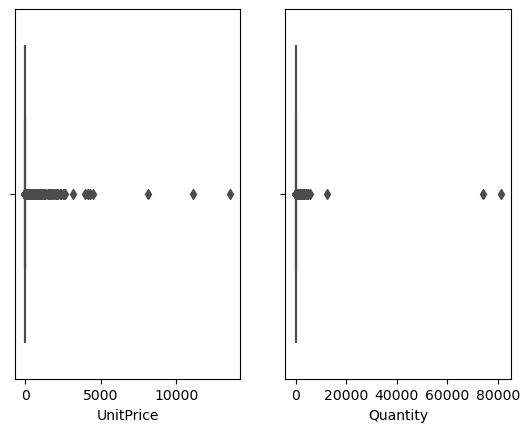

In [7]:
fig, axs = plt.subplots(ncols=2)
sns.boxplot(data=returns_df,x=sales_df['UnitPrice'],color='red',ax=axs[0])
sns.boxplot(data=sales_df,x=sales_df['Quantity'],color='red',ax=axs[1])

In [8]:
sales_df['Total'] = sales_df['UnitPrice'] * sales_df['Quantity']
sales_df.drop(columns='CustomerID',inplace=True)
sales_pivot = sales_df.pivot_table(index='Month_Year',aggfunc=np.sum)
print(sales_pivot)

            Quantity        Total   UnitPrice        index
Month_Year                                                
2010-12       361094   821452.730  198647.060    875771391
2011-01       397030   689811.610  128987.150   2045929333
2011-02       286074   522545.560  107600.480   2467344695
2011-03       384023   716215.260  144929.080   4403810288
2011-04       311314   536968.491  115129.081   4548651880
2011-05       398686   769296.610  149789.680   6866318427
2011-06       393633   760547.010  139565.420   8141523932
2011-07       405473   718076.121  142528.261  10218737122
2011-08       424264   757841.380  137903.100  10407865060
2011-09       574169  1056435.192  173874.922  16931138194
2011-10       626373  1151263.730  221646.600  23534053907
2011-11       768468  1503866.780  297325.200  38935719112
2011-12       314416   637790.330  100946.010  13153809392


C:\Users\27722\AppData\Local\Temp\ipykernel_12020\1891040507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['Total'] = sales_df['UnitPrice'] * sales_df['Quantity']
C:\Users\27722\AppData\Local\Temp\ipykernel_12020\1891040507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df.drop(columns='CustomerID',inplace=True)
C:\Users\27722\AppData\Local\Temp\ipykernel_12020\1891040507.py:3: FutureWarning: The operation <function sum at 0x000001DB5D4DCAE0> failed on a column. If any error is raised, this will raise an exception in a future version of 

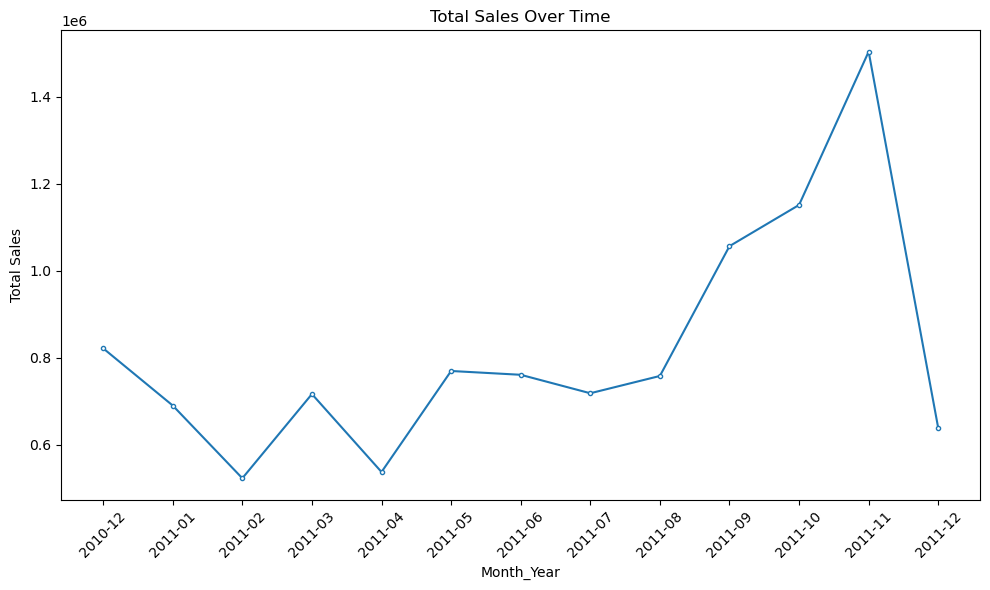

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(sales_pivot.index, sales_pivot['Total'],marker='.',markerfacecolor='white')
plt.xlabel('Month_Year')
plt.ylabel('Total Sales')
plt.title('Total Sales Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

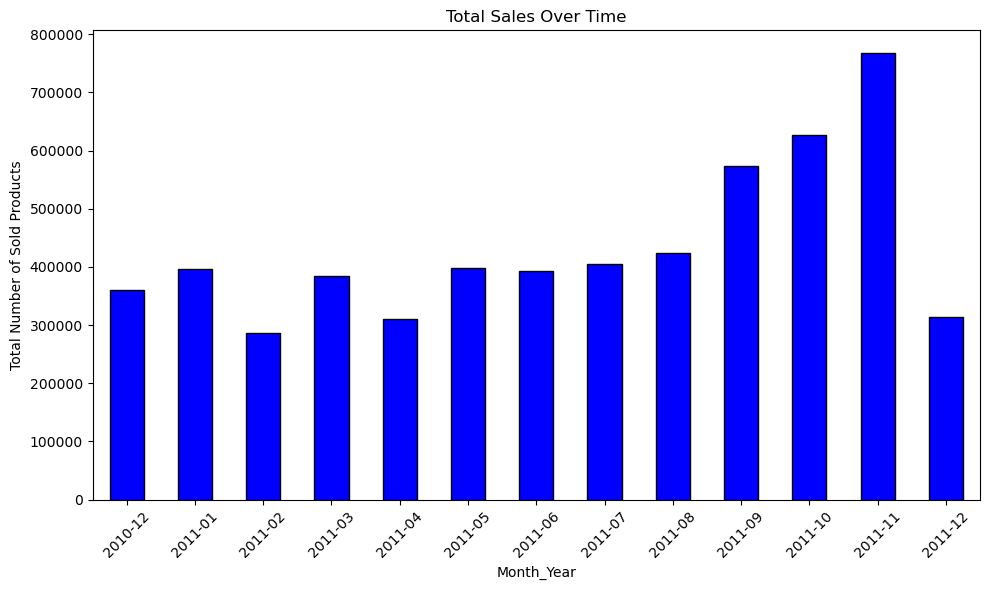

In [10]:
# Calculate the total sales for each month-year
sales_by_month_year = sales_df.groupby('Month_Year')['Quantity'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
sales_by_month_year.plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel('Month_Year')
plt.ylabel('Total Number of Sold Products')
plt.title('Total Sales Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
returns_df['Total'] = returns_df['UnitPrice'] * returns_df['Quantity']
#returns_df.drop(columns='CustomerID',inplace=True)
returns_pivot = returns_df.pivot_table(index='Month_Year',aggfunc=np.sum)
print(returns_pivot)

            CustomerID  Quantity      Total  UnitPrice      index
Month_Year                                                       
2010-12     11692276.0    -20056  -74729.12   60587.63   18198771
2011-01     11616019.0    -88749 -131363.05   43016.54   49221648
2011-02      7746964.0     -8700  -25519.15   19241.47   46268576
2011-03     12496722.0    -32858  -34201.28   25849.22  103494630
2011-04     11294213.0    -23077  -44600.65   13560.38  116062769
2011-05     11502287.0    -19034  -47202.51   40268.41  141055848
2011-06     12829324.0    -52688  -70569.78   60467.20  186099457
2011-07     12567985.0    -16422  -37919.13   28896.32  213331455
2011-08     11122615.0    -18814  -76454.92   11928.75  218439722
2011-09     14095146.0    -25500  -38838.51   24433.76  312294032
2011-10     20700961.0    -56624  -81895.50   39980.23  532280709
2011-11     18991032.0    -31286  -47720.98   26618.05  569652786
2011-12      5901116.0    -88707 -205089.27   32352.97  205349569


C:\Users\27722\AppData\Local\Temp\ipykernel_12020\2248867023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  returns_df['Total'] = returns_df['UnitPrice'] * returns_df['Quantity']
C:\Users\27722\AppData\Local\Temp\ipykernel_12020\2248867023.py:3: FutureWarning: The operation <function sum at 0x000001DB5D4DCAE0> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  returns_pivot = returns_df.pivot_table(index='Month_Year',aggfunc=np.sum)


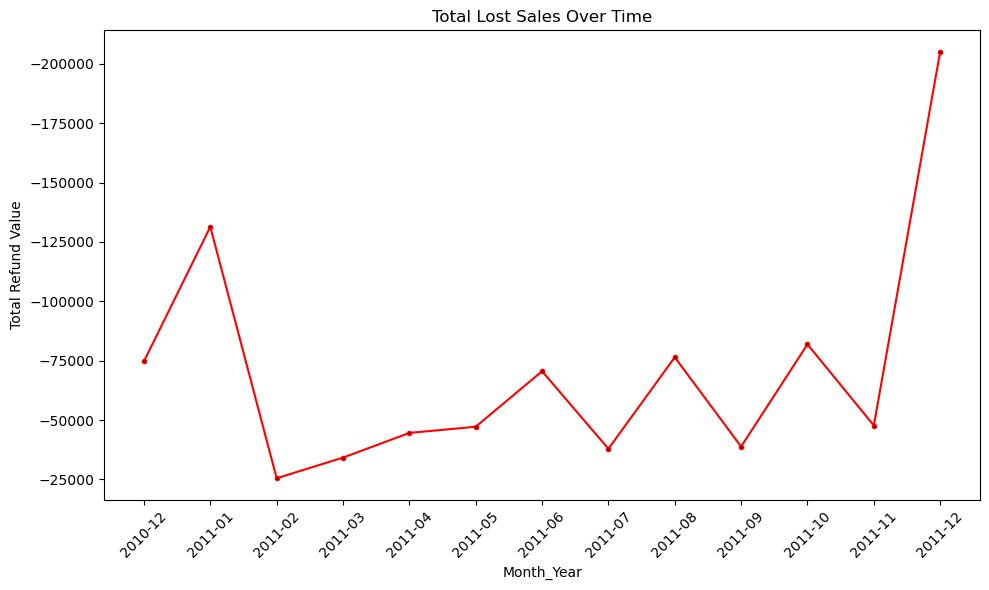

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(returns_pivot.index, returns_pivot['Total'],color='red',marker='.',markerfacecolor='maroon')
plt.xlabel('Month_Year')
plt.ylabel('Total Refund Value')
plt.title('Total Lost Sales Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

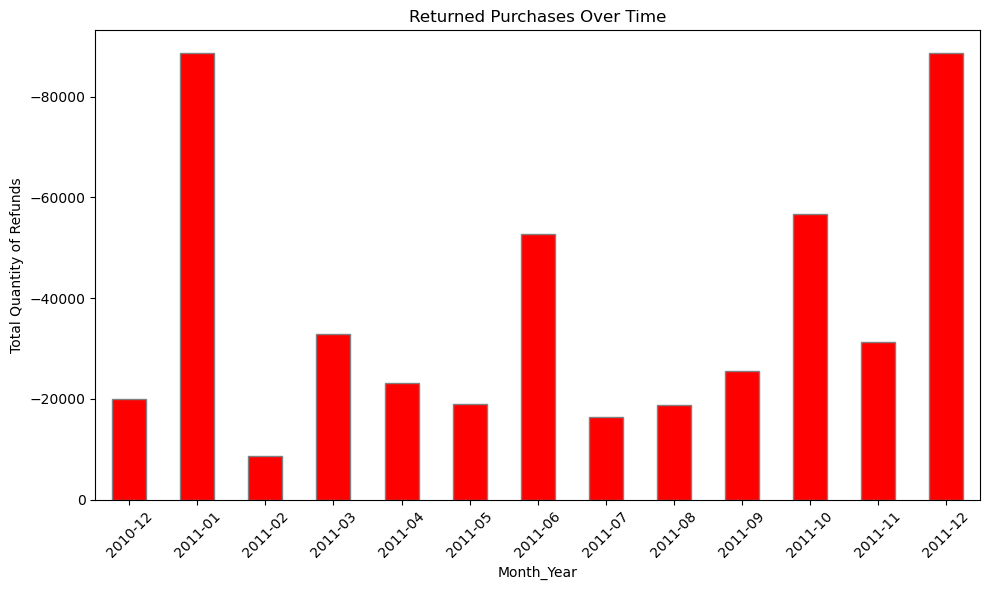

In [13]:
returns_by_month_year = returns_pivot.groupby('Month_Year')['Quantity'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
returns_by_month_year.plot(kind='bar', color='red', edgecolor='grey')
plt.xlabel('Month_Year')
plt.ylabel('Total Quantity of Refunds')
plt.title('Returned Purchases Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

In [14]:
df['Total'] = df['Quantity'] * abs(df['UnitPrice'])
raw_count = pd.DataFrame()
raw_count= df.pivot_table(values='CustomerID',index='Month_Year',aggfunc='count')
raw_count.rename(columns={'CustomerID': 'Number of Customer Interactions'}, inplace=True)
raw_count

,Number of Customer Interactions
Month_Year,
2010-12,41981
2011-01,34900
2011-02,27479
2011-03,36439
2011-04,29701
2011-05,36782
2011-06,36609
2011-07,39267
2011-08,35064


<Figure size 1000x600 with 0 Axes>

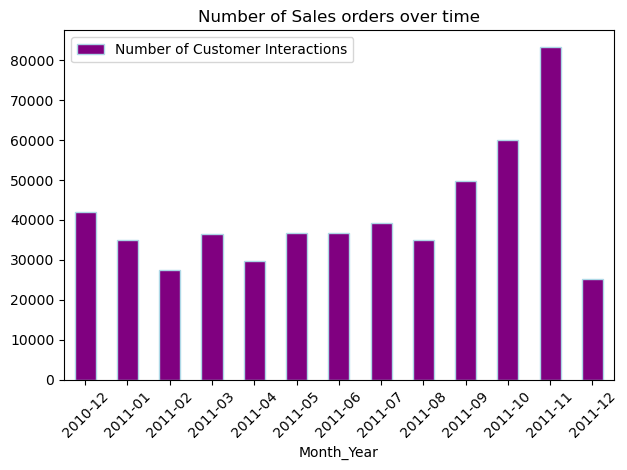

In [15]:
plt.figure(figsize=(10, 6))
raw_count.plot(kind='bar', color='purple', edgecolor='lightblue')
plt.xlabel('Month_Year')
plt.title('Number of Sales orders over time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
customer_pivot = df.pivot_table(index='CustomerID',aggfunc=np.mean)
customer_pivot = customer_pivot.sort_values(by=['Quantity'])
customer_pivot

C:\Users\27722\AppData\Local\Temp\ipykernel_12020\3945554212.py:1: FutureWarning: The operation <function mean at 0x000001DB5D4DE160> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  customer_pivot = df.pivot_table(index='CustomerID',aggfunc=np.mean)


,Quantity,Total,UnitPrice,index
CustomerID,,,,
18296.0,-9600.0,0.0,0.00,225529.5
18295.0,-9058.0,0.0,0.00,225528.0
15003.0,-5368.0,0.0,0.00,115818.0
18985.0,-3667.0,0.0,0.00,341601.0
18907.0,-3167.0,0.0,0.00,323458.0
...,...,...,...,...
18544.0,3100.0,0.0,0.00,263885.0
18162.0,4000.0,0.0,0.00,220843.0
13135.0,4300.0,3096.0,0.72,206121.0
